In [104]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_data_1 = pd.read_parquet('cicids2017/Benign-Monday-no-metadata.parquet')
df_data_2 = pd.read_parquet('cicids2017/Botnet-Friday-no-metadata.parquet')
df_data_3 = pd.read_parquet('cicids2017/Bruteforce-Tuesday-no-metadata.parquet')
df_data_4 = pd.read_parquet('cicids2017/DDoS-Friday-no-metadata.parquet')
df_data_5 = pd.read_parquet('cicids2017/DoS-Wednesday-no-metadata.parquet')
df_data_7 = pd.read_parquet('cicids2017/Portscan-Friday-no-metadata.parquet')
df_data_8 = pd.read_parquet('cicids2017/WebAttacks-Thursday-no-metadata.parquet')

In [4]:
data = pd.concat([df_data_1, df_data_2, df_data_3, df_data_4, 
                    df_data_5, df_data_7, df_data_8], axis=0, ignore_index=True)

In [5]:
null_counts = data.isnull().sum()
# Print the number of null values
print(f"{null_counts.sum()} null entries have been found in the dataset\n")
# Drop null values
data.dropna(inplace=True)          # or df_data = df_data.dropna()

# Find and handle duplicates
duplicate_count = data.duplicated().sum()
# Print the number of duplicate entries
print(f"{duplicate_count} duplicate entries have been found in the dataset\n")
# Remove duplicates
data.drop_duplicates(inplace=True)  # or df_data = df_data.drop_duplicates()
# Display relative message
print(f"All duplicates have been removed\n")

# Reset the indexes
data.reset_index(drop=True, inplace=True)

# Inspect the dataset for categorical columns
print("Categorical columns:",data.select_dtypes(include=['object']).columns.tolist(),'\n')

# Print the first 5 lines
data.head()

0 null entries have been found in the dataset

61963 duplicate entries have been found in the dataset

All duplicates have been removed

Categorical columns: ['Label'] 



,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,4,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,6,1,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,6,3,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,6,1,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,6,609,7,4,484,414,233,0,69.14286,111.967896,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [6]:
data.columns

Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Fla

In [7]:
drop_columns = [ # this list includes all spellings across CIC NIDS datasets
    "Flow ID",    
    'Fwd Header Length.1',
    "Source IP", "Src IP",
    "Source Port", "Src Port",
    "Destination IP", "Dst IP",
    "Destination Port", "Dst Port",
    "Timestamp",
]
data.drop(columns=drop_columns, inplace=True, errors='ignore')  

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044217 entries, 0 to 2044216
Data columns (total 78 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Protocol                  int8   
 1   Flow Duration             int32  
 2   Total Fwd Packets         int32  
 3   Total Backward Packets    int32  
 4   Fwd Packets Length Total  int32  
 5   Bwd Packets Length Total  int32  
 6   Fwd Packet Length Max     int16  
 7   Fwd Packet Length Min     int16  
 8   Fwd Packet Length Mean    float32
 9   Fwd Packet Length Std     float32
 10  Bwd Packet Length Max     int16  
 11  Bwd Packet Length Min     int16  
 12  Bwd Packet Length Mean    float32
 13  Bwd Packet Length Std     float32
 14  Flow Bytes/s              float64
 15  Flow Packets/s            float64
 16  Flow IAT Mean             float32
 17  Flow IAT Std              float32
 18  Flow IAT Max              int32  
 19  Flow IAT Min              int32  
 20  Fwd IAT Total           

In [9]:
data['Label'].value_counts()

Benign                        1707761
DoS Hulk                       172846
DDoS                           128014
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
PortScan                         1956
Web Attack � Brute Force         1470
Bot                              1437
Web Attack � XSS                  652
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

In [10]:
def change_label(df):
  df['Label'].replace(['DoS Hulk','DoS GoldenEye','DoS slowloris','DoS Slowhttptest'],'Dos',inplace=True)
  df['Label'].replace(['FTP-Patator','SSH-Patator','Infiltration','Heartbleed'],'Bot',inplace=True)      
  df['Label'].replace(['Web Attack � XSS','Web Attack � Sql Injection'],'WebAttack',inplace=True)
  df['Label'].replace(['Web Attack � Brute Force'],'BruteForce',inplace=True)

In [11]:
change_label(data)

In [12]:
# distribution of attack classes
data['Label'].value_counts()

Benign        1707761
Dos            193745
DDoS           128014
Bot             10598
PortScan         1956
BruteForce       1470
WebAttack         673
Name: Label, dtype: int64

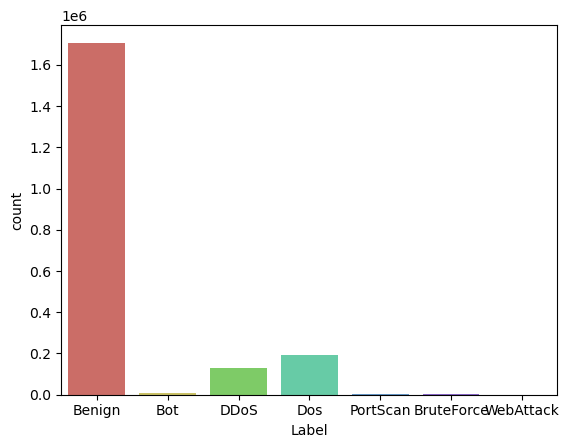

In [13]:
sns.countplot(x='Label',data=data, palette='hls')
plt.show()
#plt.savefig('count_plot') mal: the nodule malignancy, 0: benign, 1: malignant

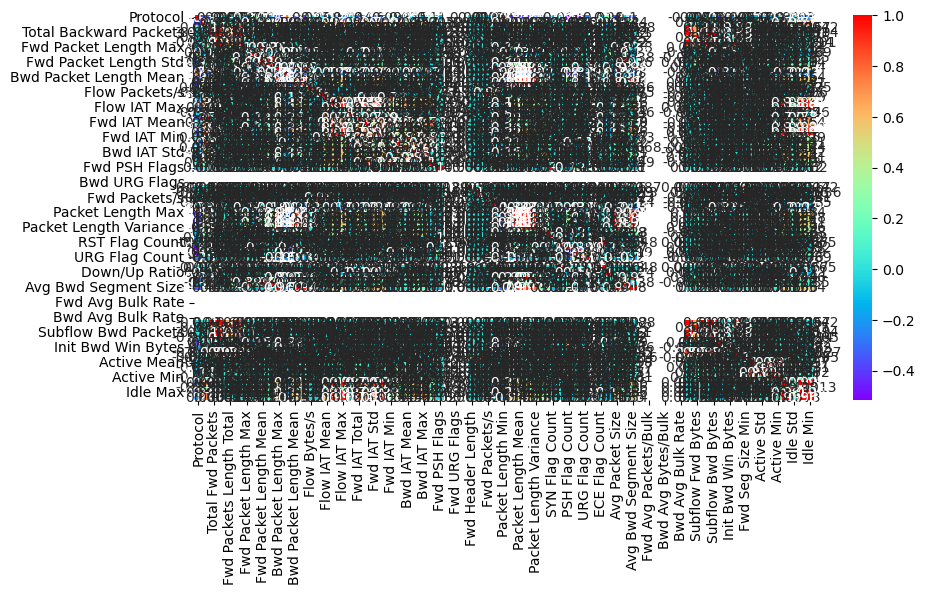

In [14]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True, cmap="rainbow")
plt.show()

In [17]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Label']= label_encoder.fit_transform(data['Label'])

data['Label'].unique()

array([0, 4, 3, 1, 5, 2, 6])

In [18]:
X = data.drop(["Label"],axis =1)
y = data["Label"]

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17697 entries, 418570 to 1981273
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Protocol                  17697 non-null  int8   
 1   Flow Duration             17697 non-null  int32  
 2   Total Fwd Packets         17697 non-null  int32  
 3   Total Backward Packets    17697 non-null  int32  
 4   Fwd Packets Length Total  17697 non-null  int32  
 5   Bwd Packets Length Total  17697 non-null  int32  
 6   Fwd Packet Length Max     17697 non-null  int16  
 7   Fwd Packet Length Min     17697 non-null  int16  
 8   Fwd Packet Length Mean    17697 non-null  float32
 9   Fwd Packet Length Std     17697 non-null  float32
 10  Bwd Packet Length Max     17697 non-null  int16  
 11  Bwd Packet Length Min     17697 non-null  int16  
 12  Bwd Packet Length Mean    17697 non-null  float32
 13  Bwd Packet Length Std     17697 non-null  float32
 14 

# FS

In [23]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

rfecv = RFE(estimator=RandomForestRegressor(),n_features_to_select=10, step=1)

rfecv.fit(X,y)

RFE(estimator=RandomForestRegressor(), n_features_to_select=10)

In [24]:
#to get number of the features
display('Number of features:', rfecv.n_features_)

#to get feature names
list(X.columns[rfecv.support_]) 

'Number of features:'

10

['Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Min',
 'Bwd IAT Std',
 'Bwd Packets/s',
 'Avg Packet Size',
 'Avg Bwd Segment Size',
 'Subflow Bwd Packets']

In [26]:
df = data[['Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Min',
 'Bwd IAT Std',
 'Bwd Packets/s',
 'Avg Packet Size',
 'Avg Bwd Segment Size',
 'Subflow Bwd Packets','Label']]

In [27]:
df.to_csv('processed.csv')

In [28]:
df = pd.read_csv('processed.csv')

In [29]:
del df['Unnamed: 0']

In [31]:
df.columns

Index(['Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Fwd IAT Total',
       'Fwd IAT Mean', 'Fwd IAT Min', 'Bwd IAT Std', 'Bwd Packets/s',
       'Avg Packet Size', 'Avg Bwd Segment Size', 'Subflow Bwd Packets',
       'Label'],
      dtype='object')

In [32]:
X = df[['Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Fwd IAT Total',
       'Fwd IAT Mean', 'Fwd IAT Min', 'Bwd IAT Std', 'Bwd Packets/s',
       'Avg Packet Size', 'Avg Bwd Segment Size', 'Subflow Bwd Packets']]
y = df["Label"]

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
#X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [34]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [35]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []


#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# XGBoost

In [36]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred    = xgb.predict(X_test)

xgb_acc = accuracy_score(y_pred, y_test)
xgb_prec = precision_score(y_pred, y_test,average='weighted')
xgb_rec = recall_score(y_pred, y_test,average='weighted')
xgb_f1 = f1_score(y_pred, y_test,average='weighted')

In [38]:
storeResults('XGBoost',xgb_acc,xgb_prec,xgb_rec,xgb_f1)

# Voting Classifier

In [39]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

clf = VotingClassifier(estimators= [('DT', dt),('RF', rf)], voting='soft')

clf.fit(X_train, y_train)

y_pred    = clf.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

In [41]:
storeResults('Voting Classifier',vot_acc,vot_prec,vot_rec,vot_f1)

# LSTM

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM, GRU, Bidirectional,BatchNormalization
from tensorflow.keras.optimizers import RMSprop


In [69]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [70]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [71]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

learning_rate = 0.001
optimizer = RMSprop(learning_rate=learning_rate)
model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                12200     
                                                                 
 dropout_14 (Dropout)        (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 12,251
Trainable params: 12,251
Non-trainable params: 0
_________________________________________________________________


In [73]:
history = model.fit(X_train, y_train, epochs=5, batch_size=2, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
7079/7079 [==============================] - 43s 6ms/step - loss: -49.4994 - accuracy: 0.5960 - val_loss: -111.8355 - val_accuracy: 0.6096
Epoch 2/5
7079/7079 [==============================] - 41s 6ms/step - loss: -173.1716 - accuracy: 0.5962 - val_loss: -230.9519 - val_accuracy: 0.6096
Epoch 3/5
7079/7079 [==============================] - 41s 6ms/step - loss: -288.8127 - accuracy: 0.5962 - val_loss: -344.1195 - val_accuracy: 0.6096
Epoch 4/5
7079/7079 [==============================] - 40s 6ms/step - loss: -402.7882 - accuracy: 0.5962 - val_loss: -456.2601 - val_accuracy: 0.6096
Epoch 5/5
7079/7079 [==============================] - 41s 6ms/step - loss: -514.2949 - accuracy: 0.5962 - val_loss: -568.1601 - val_accuracy: 0.6096


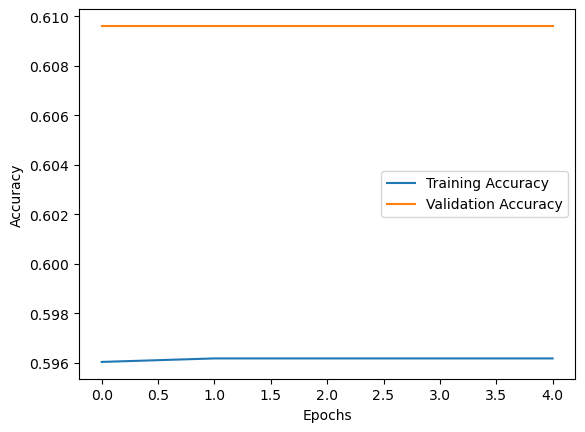

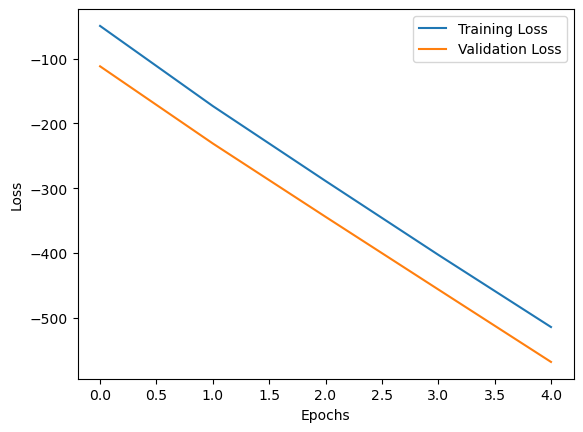

In [74]:
import matplotlib.pyplot as plt

# Plotting akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting kerugian
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [76]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.55).astype("int32")

dl_acc = accuracy_score(y_test,y_pred)
dl_prec = precision_score(y_test,y_pred,average='weighted')
dl_rec = recall_score(y_test,y_pred,average='weighted')
dl_f1 = f1_score(y_test,y_pred,average='weighted')

storeResults('LSTM',dl_acc,dl_prec,dl_rec,dl_f1)

111/111 [==============================] - 0s 2ms/step


# minVGG

In [77]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [78]:
def minVGG(input_shape):
    model = Sequential()
    
    model.add(Conv1D(64, 1, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(1))
    model.add(Dropout(0.1))
    
    model.add(Conv1D(32, 2, activation='relu'))  # Added another convolutional layer
    model.add(MaxPooling1D(2))  # Increased pooling window size
    model.add(Dropout(0.1))  # Adjusted dropout rate
    
    model.add(Conv1D(16, 2, activation='relu'))  # Added another convolutional layer
    model.add(MaxPooling1D(1))  # Increased pooling window size
    model.add(Dropout(0.1))  # Adjusted dropout rate
    
#     model.add(Conv1D(16,2, activation='relu'))  # Added another convolutional layer
#     model.add(MaxPooling1D(1))  # Increased pooling window size
#     model.add(Dropout(0.1))  # Adjusted dropout rate
    
    model.add(Flatten())
    # No LSTM layer here (focusing on CNN)
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification
    return model

In [79]:
model = minVGG((X_train.shape[1], 1))

In [ ]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 10, 64)            128       
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 10, 64)           0         
 g1D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 10, 64)            0         
                                                                 
 conv1d_17 (Conv1D)          (None, 9, 32)             4128      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 4, 32)            0         
 g1D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 4, 32)            

In [81]:
history1 = model.fit(X_train, y_train, epochs=5, batch_size=2, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
7079/7079 [==============================] - 45s 6ms/step - loss: -102470736.0000 - accuracy: 0.5961 - val_loss: -608829760.0000 - val_accuracy: 0.6096
Epoch 2/5
7079/7079 [==============================] - 42s 6ms/step - loss: -6580042752.0000 - accuracy: 0.5962 - val_loss: -19744122880.0000 - val_accuracy: 0.6096
Epoch 3/5
7079/7079 [==============================] - 42s 6ms/step - loss: -68570021888.0000 - accuracy: 0.5962 - val_loss: -149629452288.0000 - val_accuracy: 0.6096
Epoch 4/5
7079/7079 [==============================] - 42s 6ms/step - loss: -354617425920.0000 - accuracy: 0.5962 - val_loss: -638019764224.0000 - val_accuracy: 0.6096
Epoch 5/5
7079/7079 [==============================] - 42s 6ms/step - loss: -1218421194752.0000 - accuracy: 0.5962 - val_loss: -1944866914304.0000 - val_accuracy: 0.6096


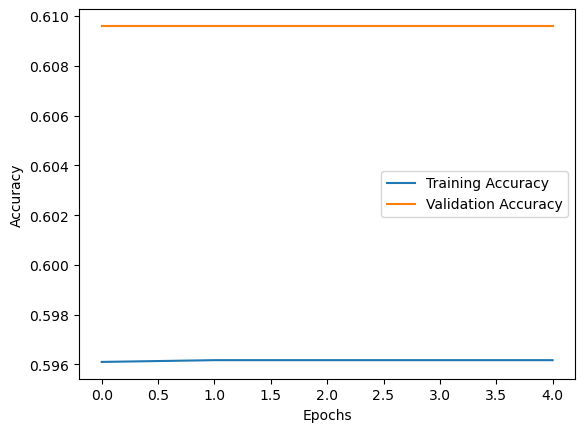

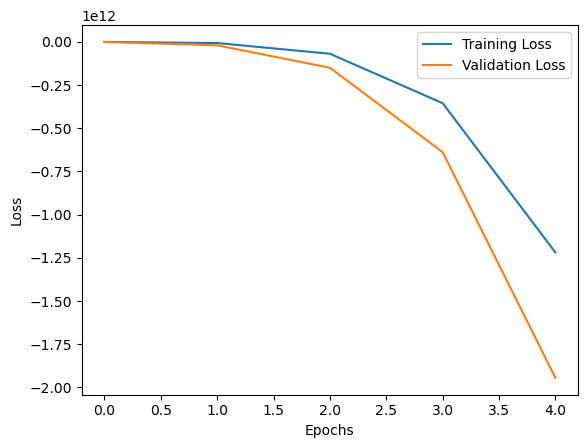

In [82]:
# Plotting akurasi
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting kerugian
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [83]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.55).astype("int32")

dl_acc = accuracy_score(y_test,y_pred)
dl_prec = precision_score(y_test,y_pred,average='weighted')
dl_rec = recall_score(y_test,y_pred,average='weighted')
dl_f1 = f1_score(y_test,y_pred,average='weighted')

storeResults('minVGG',dl_acc,dl_prec,dl_rec,dl_f1)

111/111 [==============================] - 0s 1ms/step


# AlexNet

In [84]:
def AlexNet(input_shape):
    model = Sequential()
    
    model.add(Conv1D(64, 1, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(1))
    model.add(Dropout(0.1))
    
    model.add(Conv1D(32, 2, activation='relu'))  # Added another convolutional layer
    model.add(MaxPooling1D(2))  # Increased pooling window size
    model.add(Dropout(0.1))  # Adjusted dropout rate
    
    model.add(Conv1D(16, 2, activation='relu'))  # Added another convolutional layer
    model.add(MaxPooling1D(1))  # Increased pooling window size
    model.add(Dropout(0.1))  # Adjusted dropout rate
    
    model.add(Conv1D(16,2, activation='relu'))  # Added another convolutional layer
    model.add(MaxPooling1D(1))  # Increased pooling window size
    model.add(Dropout(0.1))  # Adjusted dropout rate
    
    model.add(Flatten())
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification
    return model

In [85]:
model = AlexNet((X_train.shape[1], 1))

In [86]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_19 (Conv1D)          (None, 10, 64)            128       
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 10, 64)           0         
 g1D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 10, 64)            0         
                                                                 
 conv1d_20 (Conv1D)          (None, 9, 32)             4128      
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 4, 32)            0         
 g1D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 4, 32)           

In [87]:
history2 = model.fit(X_train, y_train, epochs=5, batch_size=2, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
7079/7079 [==============================] - 49s 7ms/step - loss: -6725088768.0000 - accuracy: 0.5962 - val_loss: -46788345856.0000 - val_accuracy: 0.6096
Epoch 2/5
7079/7079 [==============================] - 49s 7ms/step - loss: -865313882112.0000 - accuracy: 0.5962 - val_loss: -3046573867008.0000 - val_accuracy: 0.6096
Epoch 3/5
7079/7079 [==============================] - 49s 7ms/step - loss: -14638731231232.0000 - accuracy: 0.5962 - val_loss: -35898590756864.0000 - val_accuracy: 0.6096
Epoch 4/5
7079/7079 [==============================] - 50s 7ms/step - loss: -104216576131072.0000 - accuracy: 0.5962 - val_loss: -210200111874048.0000 - val_accuracy: 0.6096
Epoch 5/5
7079/7079 [==============================] - 50s 7ms/step - loss: -470406628638720.0000 - accuracy: 0.5962 - val_loss: -828456174616576.0000 - val_accuracy: 0.6096


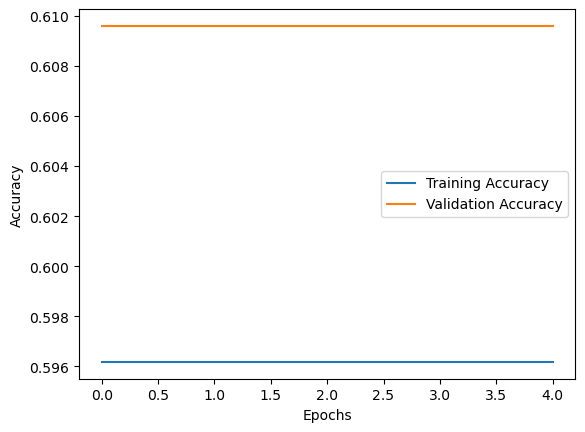

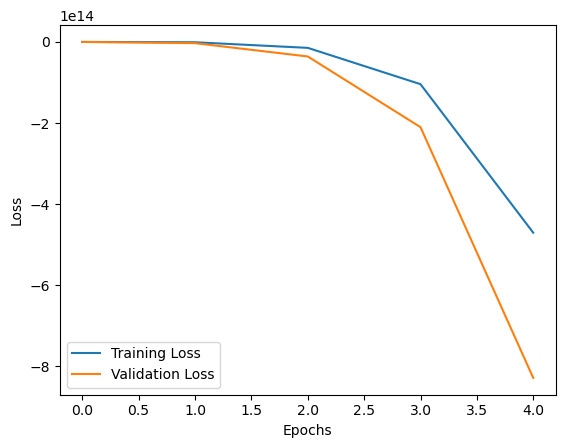

In [88]:
# Plotting akurasi
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting kerugian
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [89]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.55).astype("int32")

dl_acc = accuracy_score(y_test,y_pred)
dl_prec = precision_score(y_test,y_pred,average='weighted')
dl_rec = recall_score(y_test,y_pred,average='weighted')
dl_f1 = f1_score(y_test,y_pred,average='weighted')

storeResults('AlexNet',dl_acc,dl_prec,dl_rec,dl_f1)

111/111 [==============================] - 0s 2ms/step


# CNN + BiLSTM

In [95]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Reshape

In [96]:
def build_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, 1, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(1))
    model.add(Dropout(0.1))
    model.add(Flatten())
    # Mengubah bentuk ke (batch_size, timesteps, features)
    model.add(Reshape((input_shape[0], 32)))
    model.add(Bidirectional(LSTM(50, activation='tanh', return_sequences=False)))
    model.add(Dropout(0.1))
    model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [97]:
model = build_model((X_train.shape[1], 1))
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_25 (Conv1D)          (None, 10, 32)            64        
                                                                 
 batch_normalization_1 (Batc  (None, 10, 32)           128       
 hNormalization)                                                 
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 10, 32)           0         
 g1D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 10, 32)            0         
                                                                 
 flatten_6 (Flatten)         (None, 320)               0         
                                                                 
 reshape (Reshape)           (None, 10, 32)          

In [98]:
history3 = model.fit(X_train, y_train, epochs=5, batch_size=2, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
7079/7079 [==============================] - 89s 12ms/step - loss: -15801.3457 - accuracy: 0.5962 - val_loss: -46363.5039 - val_accuracy: 0.6096
Epoch 2/5
7079/7079 [==============================] - 85s 12ms/step - loss: -107516.1016 - accuracy: 0.5962 - val_loss: -182226.6406 - val_accuracy: 0.6096
Epoch 3/5
7079/7079 [==============================] - 85s 12ms/step - loss: -290092.1875 - accuracy: 0.5962 - val_loss: -409676.2812 - val_accuracy: 0.6096
Epoch 4/5
1878/7079 [======>.......................] - ETA: 58s - loss: -454465.5000 - accuracy: 0.5958

In [99]:
# Plotting akurasi
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting kerugian
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [100]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.55).astype("int32")

dl_acc = accuracy_score(y_test,y_pred)
dl_prec = precision_score(y_test,y_pred,average='weighted')
dl_rec = recall_score(y_test,y_pred,average='weighted')
dl_f1 = f1_score(y_test,y_pred,average='weighted')

storeResults('CNN+BiLSTM',dl_acc,dl_prec,dl_rec,dl_f1)

# Comparison

In [105]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score
                      }) 

In [106]:
result

,ML Model,Accuracy,Precision,Recall,F1_score
0,XGBoost,0.944,0.952,0.944,0.948
1,Voting Classifier,0.995,0.996,0.995,0.996
2,LSTM,0.610,0.372,0.610,0.462
3,minVGG,0.610,0.372,0.610,0.462
4,AlexNet,0.610,0.372,0.610,0.462
5,CNN+BiLSTM,0.610,0.372,0.610,0.462


# Modelling

In [107]:
import joblib
filename = 'model.sav'
joblib.dump(clf, filename)

['model.sav']

# Graph

In [108]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

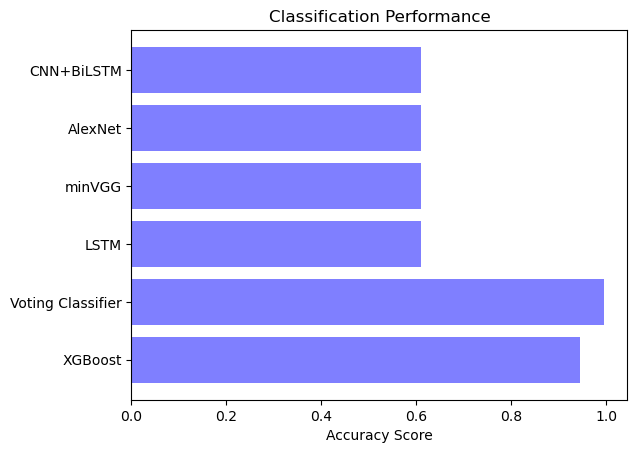

In [109]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

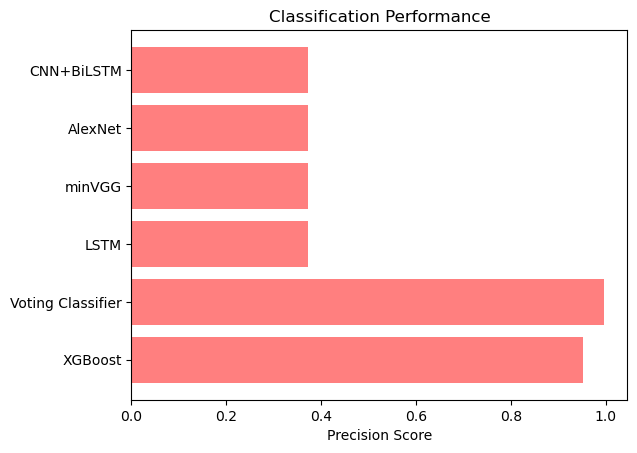

In [110]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

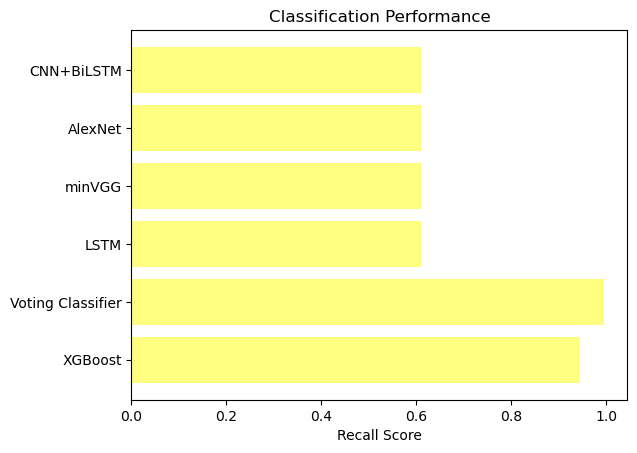

In [111]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

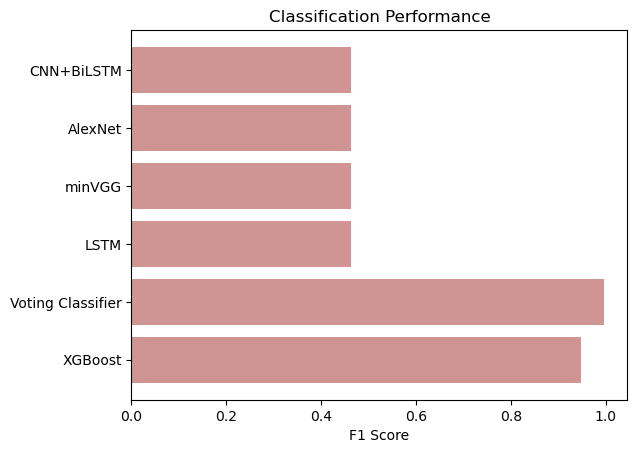

In [112]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()